# MDC 1.1

In [27]:
import numpy as np   #import numpy to store and manipulate data as arrays
import matplotlib.pyplot as plt   #import library for ploting data
import corner
import numpy.random as nprd
from scipy.special import logsumexp
from scipy import integrate
import sympy

In [2]:
n = 1000   #set data size to 1000

#Reading data from file MDC1.txt
y = []   #create empty list to store y-values 
x = []   #create empty list to store x-values
with open(r"C:\Users\pc\Desktop\Mock data challenge data and resources-20220329\MDC1.txt", "r") as file:   #open file (using directory) in read mode
     for i in range(n):        #loop over all lines in  file
        line = file.readline().split()   #read individual lines and return as list 
        x.append(float(line[0]))    #add 1st item from list (each line) to the created list variable for x -values 
        y.append(float(line[1]))    #add 2nd item from list (each line) to the created list variable for y -values


# 1.1a

In [29]:
y = np.array(y)    #convert list of y values to an array
x = np.array(x)    #convert list of x values to an array 
a_ls = ((np.sum(y)*np.sum(x**2))-(np.sum(x*y)*np.sum(x)))/(n*np.sum(x**2)-np.sum(x)**2)    #formula to calculate parameter estimate for a (as given in lecture 3)
a_ls

5.205086430306582

In [30]:
b_ls = (n*np.sum(x*y)-(np.sum(x)*np.sum(y)))/(n*np.sum(x**2)-np.sum(x)**2)  #formula to calculate parameter estimate for b (as given in lecture 3)
b_ls

3.0989125339386834

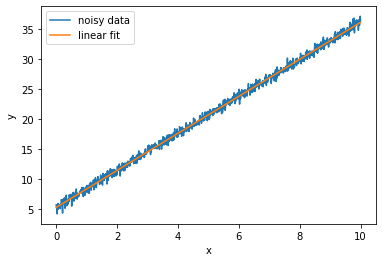

In [33]:
y1 = a_ls + (b_ls*x)  #substiting estimated a and b vaues into linear model to obtain the expected y value
plt.plot(x , y)
plt.plot(x, y1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["noisy data", "linear fit"])
plt.show()

# 1.1b

In [6]:
#%matplotlib inline
#nbins = 10
#e = (e-min(e))/(max(e)-min(e))
#plt.hist(e, nbins)
#plt.show()

In [7]:
e = y-y1   #taking the difference between observed and model values to obtain the residual/noise
var = np.var(e)   #compute variance of the noise
var

0.2414396818688744

In [8]:
#plt.hist(x, 20)
#plt.show()

# 1.1c

In [9]:
sigma = np.sqrt(var)   #compute standard deviation from the variance 
var_als = sigma**2*np.sum(x**2)/(n*np.sum(x**2)-np.sum(x)**2)  #define formula to calculate variance of estimate of a (as given in lecture 3)
sigma, var_als   #print variance of estimate of a

(0.491365120728847, 0.000964312908590158)

In [10]:
sigma_a = np.sqrt(var_als)   #calculate error in a from variance
sigma_a

0.031053388037219996

In [11]:
var_bls = n*sigma**2/(n*np.sum(x**2)-np.sum(x)**2) #define formula to calculate variance of estimate of b (as given in the lecture 3)
var_bls #print variance of estimate of b

2.8914929068851343e-05

In [12]:
sigma_b = np.sqrt(var_bls)   #calculate error in b from its variance
sigma_b

0.005377260368333613

In [13]:
cov = -sigma**2*np.sum(x)/(n*np.sum(x**2)-np.sum(x)**2)  #define covariance formula (as given in Lecture 3)
cov

-0.00014457464534425673

In [14]:
#chi_sq = np.sum(((y-(a_ls+b_ls*x))/sigma)**2) #formula for calculating chi_square for the given model
#chi_sq

# 1.2

In [15]:
#compute log likelihood on rectangular grid of a and b values
# adopting a gaussian likelihood

#q = sigma/np.sqrt(n)
a_low = a_ls - var #define lower limit of a values
a_upp = a_ls + var  #define upper limit of a values
b_low = b_ls - var #define lower limit of b values
b_upp = b_ls + var #define upper limit of b values
m = 400  # set number of trials
a = np.linspace(a_low, a_upp, m)   #obtain m number of values for a within the defined range
b = np.linspace(b_low, b_upp, m)   ##obtain m number of values for b within the defined range

log_l = np.zeros((m,m))   #initialise log-likelihhod array for each (a,b) pair
p = n/2*np.log(2*np.pi)  #asign variable to first term in log likelihood
q = n*np.log(sigma)      # #asign variable to second term in log likelihood

for i in range(0,m):   #loop over each value of a
    for j in range(0,m):  #loop over each value of b for each ith iteration of a
        for k in range(0, n):   #loop over each x and y value for each grid of (a,b)
            log_l[i,j] = log_l[i,j]-p-q-((1/2)*((y[k]-(a[i]+b[j]*x[k]))/sigma)**2)  #update log liklihood entry with computed log-likehood on each grid
#print(log_l)


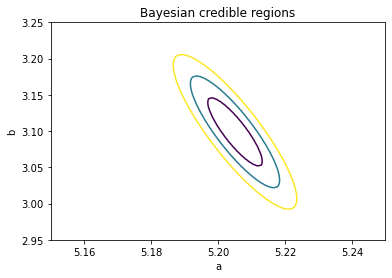

In [16]:
##Calculate chi-squared for trial parameters
a_low = a_ls - var #define lower limit of a values
a_upp = a_ls + var  #define upper limit of a values
b_low = b_ls - var #define lower limit of b values
b_upp = b_ls + var #define upper limit of b values
m = 400  # set number of trials
a = np.linspace(a_low, a_upp, m)   #obtain m number of values for a within the defined range
b = np.linspace(b_low, b_upp, m)   ##obtain m number of values for b within the defined range
chi_sq = np.zeros((m,m))  #initialise chi square array with zeroes 

for i in range(0,m):  #loop over each value of a
    for j in range(0,m):   #loop over each value of b for each ith iteration of a
        for k in range(0, n):  #loop over each x and y value for each grid of (a,b)
            chi_sq[i,j] = chi_sq[i,j] + ((y[k]-(a[i]+b[j]*x[k]))/sigma)**2   #update chi-square entry with computed chi-squared value on each grid

#Calculate delchisq
chisq_min = np.amin(chi_sq)  #obtain the array minimum of the chi square 
delchisq = chi_sq - chisq_min #compute delta chi square from difference between the chi square and the computed minimun array value

#Create and plot contours
cont = [2.3, 6.17, 11.8]   #define contour line to reqiured delta chi squares of 2.3, 6.17, 11.8 corresponding to p-values of 68.3%, 95.4% and 99.73%, respectively.
ax = plt.contour(a,b,delchisq,cont)  #contour plot for specified baysian credible regions
plt.xlabel("a")   #label x-axis
plt.ylabel("b")  #label y-axis
plt.xlim(5.15, 5.25) #set x-axis limit
plt.ylim(2.95, 3.25)  #set y-axis limit
plt.title("Bayesian credible regions")
plt.show()  #show plot




In [17]:
k = 3 #set number of credible regions
p = ["68.3%", "95.4%", "99.73%"]
for i in range(0, k):
    t = ax.collections[i].get_paths()[0]
    vals = t.vertices
    a_vals = vals[:, 0]
    b_vals = vals[:, 1]
    print("Baysian credible region for " + p[i] + " exists for a between " + str(min(a_vals))+ " and " + str(max(a_vals)))
    print("Baysian credible region for " + p[i] + " exists for b between " + str(min(b_vals))+ " and " + str(max(b_vals)), end = "\n\n")

Baysian credible region for 68.3% exists for a between 5.196968161127856 and 5.213204699485312
Baysian credible region for 68.3% exists for b between 3.051916660465301 and 3.145908407412044

Baysian credible region for 95.4% exists for a between 5.19177229549442 and 5.21840056511875
Baysian credible region for 95.4% exists for b between 3.0217113646170097 and 3.1761137032603326

Baysian credible region for 99.73% exists for a between 5.186635386779581 and 5.223537473833591
Baysian credible region for 99.73% exists for b between 2.9922659155965503 and 3.205559152280788



# 1.3

Samples
[[5.2        3.1       ]
 [5.2        3.1       ]
 [5.2        3.1       ]
 ...
 [5.14541629 3.10587893]
 [5.14541629 3.10587893]
 [5.14541629 3.10587893]]

From MCMC
a           b
[5.20266172784987, 3.099404875738563]
[0.030777265908469312, 0.005387520179187489]
Covariance
-0.00014202507499978673
Acceptance Ratio
0.3621


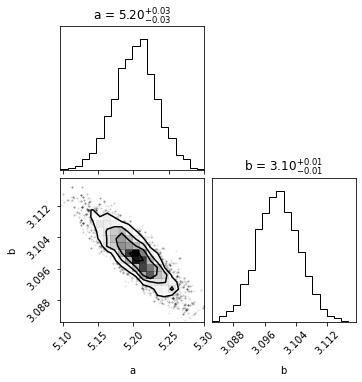

In [18]:
#Metropolis Algorithm

nmcmc = 10000  #define length of markov chain or walks

a = np.zeros(nmcmc)  #initialise array for a values
b = np.zeros(nmcmc)  #initialise array for b values
d = (nmcmc,2)    #define sample dimension  i.e 10000 by 2
samples = np.zeros(d) #initialise sample array with defined dimension 
chisq = np.zeros(nmcmc)  #initialise chi_square array

##Specify initial values, width of proposal density, and counter to compute acceptance ratio

accept = 0  #initialise acceptance counter to 0
a[0] = 5.2  #initialise starting point of a value
samples[0,0] = 5.2 #initialise first sample array element with starting value for a 
sig_a = sigma_a  #define standard deviation of a as obtained from 1.1
b[0] =  3.1 #initialise first sample array element with starting value for a 
samples[0,1] = 3.1  #initialise first sample array element with starting value for a
sig_b = sigma_b  #define standard deviation of b as obtained from 1.1

##Loop over the data points for chisquared calculation
for k in range(0,n):
    chisq[0] = chisq[0] + ((y[k]-(a[0]+b[0]*x[k]))/sigma)**2  #compute chi square for starting point (a,b) pairs for each (x,y) pair

##Go over points in the chain
for i in range(1,nmcmc):

    ##Determine trial values
    a_trial = a[i-1] + sig_a*nprd.randn(1)  #define trial value for a  
    b_trial = b[i-1] + sig_b*nprd.randn(1)  #define trial value for b

    ##Set initial value of chisq for trial point
    chisq_trial = 0

    ##Calculate the value of chisq for trial point
    for k in range(0,len(x)):
        chisq_trial = chisq_trial + ((y[k]-(a_trial+b_trial*x[k]))/sigma)**2  #compute and update chi square value for each (x,y) pair

    ##Calculate trial value of log ratio
    log_Lratio = 0.5*(chisq[i-1]-chisq_trial)  

    ##Decide whether or not to accept trial value
    ##If trial point is "uphill" from previous point, accept it
    if log_Lratio >= 0:
        a[i] = a_trial   #set current a value to trial value
        b[i] = b_trial   #set current b value to trial value
        samples[i,0] = a[i]  # update each ith sample a value with the current a value 
        samples[i,1] = b[i]  # update each ith sample b value with the current b value 
        chisq[i] = chisq_trial  #set each chi square value to computed trial value above on each iteration
        accept = accept + 1  #accept and increase acceptance by 1

    ##If it is not, calculate the actual likelihood ratio, then pick a random number and if bigger accept, if smaller set the point as the previous point in the Markov Chain
    else:
        ratio = np.exp(log_Lratio) # define likelihood ratio formula as exponential of computed log ratio
        test_uniform = nprd.rand(1)  # generate a random number

        if test_uniform < ratio:  #check if random number is less than the computed ratio
            a[i] = a_trial  #set current a value to the trial value
            b[i] = b_trial  #set current b value to the trial value
            samples[i,0] = a[i] # update current ith sample a value with the current a value(i.e trial value)
            samples[i,1] = b[i]  # update current sample b value with the current b value
            chisq[i] = chisq_trial   #set each chi square value to computed trial value above on each iteration
            accept = accept + 1    #accept and increase acceptance by 1

        else: #if random number is greater than the computed ratio, then:
            a[i] = a[i-1] #set the current value of a to the previous value of a
            b[i] = b[i-1] #set the current value of a to the previous value of a
            samples[i,0] = a[i]  # update current sample a value with the current a value(i.e trial value)
            samples[i,1] = b[i]   # update current sample b value with the current b value
            chisq[i] = chisq[i-1]  #set each chi square value to previous trial value 

accept_ratio = accept/nmcmc  #define acceptance ratio as number of time the parameter is accepted out of total trial times

##Plotting and information

##Do corner plot
print("Samples")
print(samples)  #print samples

figure = corner.corner(samples, labels = (["a", "b", "c"]), show_titles = True)  #make a corner plot of samples

mean = [np.mean(a), np.mean(b)]  #compute mean of parameters a and b
stdev = [np.std(a), np.std(b)]   #compute standard deviation of parameters a and b 

cov = np.cov(a,b)  #compute covariance of and b
covar = cov[0,1]  

print("")
print("From MCMC")
print("a           b")
print(mean)
print(stdev)
print("Covariance")
print(covar)
print("Acceptance Ratio")
print(accept_ratio)


# PART 2

# 2.1

In [34]:
n = 1000   #set data size to 1000

#Reading data from file MDC1.txt
y = []   #create empty list to store y-values 
x = []   #create empty list to store x-values
with open(r"C:\Users\pc\Desktop\Mock data challenge data and resources-20220329\MDC2.txt", "r") as file:   #open file (using directory) in read mode
    for i in range(n):        #loop over all lines in  file
        line = file.readline().split()   #read individual lines and return as list 
        x.append(float(line[0]))    #add 1st item from list (each line) to the created list variable for x -values 
        y.append(float(line[1]))    #add 2nd item from list (each line) to the created list variable for y -values

In [35]:
y = np.array(y)    #convert list of y values to an array
x = np.array(x)    #convert list of x values to an array 

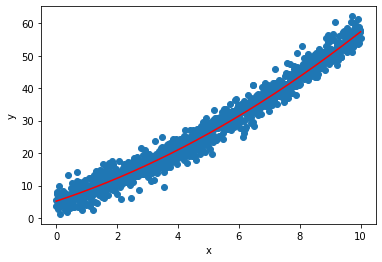

0.21160310964643528


In [36]:

fit = np.polyfit(x, y, 2)
c = fit[0]
y1 =  a_ls + (b_ls*x)+(c*x**2)
plt.plot(x, y1, "r")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(c)

In [37]:
y1 =  a_ls + (b_ls*x)+(c*x**2)
e = y - y1
sigma = np.sqrt(np.var(e))
sigma

2.5420111708681117

Samples
[[5.2        3.1        0.2       ]
 [5.2        3.1        0.2       ]
 [5.21555987 3.10130709 0.21065029]
 ...
 [4.94912337 3.31981691 0.19375678]
 [4.94912337 3.31981691 0.19375678]
 [4.94912337 3.31981691 0.19375678]]

From MCMC
a                        b                        c
[4.837009915750025, 3.291998708390337, 0.20115398505899545]
[0.31026079142712537, 0.13128383201198165, 0.012210162337990937]
Acceptance Ratio
0.2156


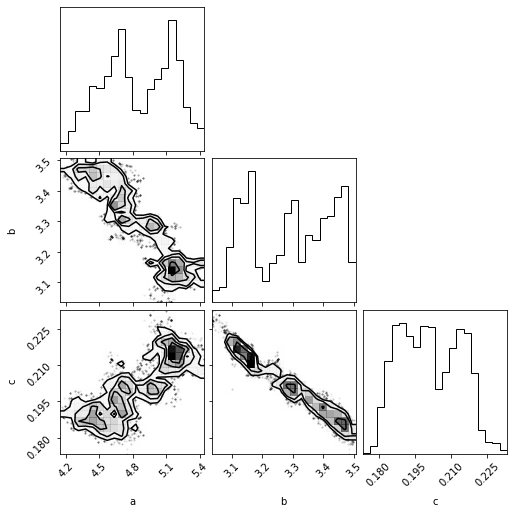

In [38]:
#Metropolis Algorithm

nmcmc = 10000  #define length of markov chain or walks

a = np.zeros(nmcmc)  #initialise array for a values
b = np.zeros(nmcmc)  #initialise array for b values
c = np.zeros(nmcmc)
d = (nmcmc,3)    #define sample dimension  i.e 10000 by 2
samples = np.zeros(d) #initialise sample array with defined dimension 
chisq = np.zeros(nmcmc)  #initialise chi_square array

##Specify initial values, width of proposal density, and counter to compute acceptance ratio

accept = 0  #initialise acceptance counter to 0
a[0] = 5.2  #initialise starting point of a value
samples[0,0] = 5.2 #initialise first sample array element with starting value for a 
sig_a = sigma_a  #define standard deviation of a as obtained from 1.1
b[0] = 3.1   #initialise first sample array element with starting value for a 
samples[0,1] = 3.1  #initialise first sample array element with starting value for a
sig_b = sigma_b  #define standard deviation of b as obtained from 1.1
c[0] = 0.2
samples[0,2] = 0.2
sig_c = 0.01

##Loop over the data points for chisquared calculation
for k in range(0,n):
    chisq[0] = chisq[0] + ((y[k]-(a[0]+b[0]*x[k]+c[0]*x[k]**2))/sigma)**2  #compute chi square for starting point (a, b, c) pairs for each (x,y) pair

##Go over points in the chain
for i in range(1,nmcmc):

    ##Determine trial values
    a_trial = a[i-1] + sig_a*nprd.randn(1)  #define trial value for a  
    b_trial = b[i-1] + sig_b*nprd.randn(1)  #define trial value for b
    c_trial = c[i-1] + sig_c*nprd.randn(1)   #define trial value for c
    ##Set initial value of chisq for trial point
    chisq_trial = 0

    ##Calculate the value of chisq for trial point
    for k in range(0,len(x)):
        chisq_trial = chisq_trial + ((y[k]-(a_trial+b_trial*x[k]+c_trial*x[k]**2))/sigma)**2  #compute and update chi square value for each (x,y) pair

    ##Calculate trial value of log ratio
    log_Lratio = 0.5*(chisq[i-1]-chisq_trial)  

    ##Decide whether or not to accept trial value
    ##If trial point is "uphill" from previous point, accept it
    if log_Lratio >= 0:
        a[i] = a_trial   #set current a value to trial value
        b[i] = b_trial   #set current b value to trial value
        c[i] = c_trial   #set current c value to trial value
        samples[i, 0] = a[i]  # update each ith sample a value with the current a value 
        samples[i, 1] = b[i]  # update each ith sample b value with the current b value 
        samples[i, 2] = c[i]   # update each ith sample c value with the current c value 
        chisq[i] = chisq_trial  #set each chi square value to computed trial value above on each iteration
        accept = accept + 1  #accept and increase acceptance by 1

    ##If it is not, calculate the actual likelihood ratio, then pick a random number and if bigger accept, if smaller set the point as the previous point in the Markov Chain
    else:
        ratio = np.exp(log_Lratio) # define likelihood ratio formula as exponential of computed log ratio
        test_uniform = nprd.rand(1)  # generate a random number

        if test_uniform < ratio:  #check if random number is less than the computed ratio
            a[i] = a_trial  #set current a value to the trial value
            b[i] = b_trial  #set current b value to the trial value
            c[i] = c_trial   #set current b value to the trial value
            samples[i,0] = a[i] # update current ith sample a value with the current a value(i.e trial value)
            samples[i,1] = b[i]  # update current sample b value with the current b value
            samples[i,2] = c[i]  # update current sample c value with the current c value
            chisq[i] = chisq_trial   #set each chi square value to computed trial value above on each iteration
            accept = accept + 1    #accept and increase acceptance by 1

        else: #if random number is greater than the computed ratio, then:
            a[i] = a[i-1] #set the current value of a to the previous value of a
            b[i] = b[i-1] #set the current value of b to the previous value of b
            c[i] = c[i-1] #set the current value of c to the previous value of c
            samples[i,0] = a[i]  # update current sample a value with the current a value(i.e trial value)
            samples[i,1] = b[i]   # update current sample b value with the current b value
            samples[i,2] = c[i]   # update current sample c value with the current c value
            chisq[i] = chisq[i-1]  #set each chi square value to previous trial value 

accept_ratio = accept/nmcmc  #define acceptance ratio as number of time the parameter is accepted out of total trial times

##Plotting and information

##Do corner plot
print("Samples")
print(samples)  #print samples

figure = corner.corner(samples, labels = (["a", "b", "c"]), show_title = True)  #make a corner plot of samples

mean = [np.mean(a), np.mean(b), np.mean(c)]  #compute mean of parameters a and b
stdev = [np.std(a), np.std(b), np.std(c)]   #compute standard deviation of parameters a and b 
  

print("")
print("From MCMC")
print("a                        b                        c")
print(mean)
print(stdev)
#print("Covariance")
#print(covar)
print("Acceptance Ratio")
print(accept_ratio)

# 2.2

In [ ]:
z